In this notebook the Grüneisen parameter for lake Tanganyika and the Mediterranean Sea will be calculated.

In [1]:
from scipy.integrate import quad
from scipy.integrate import simps
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

In the oceans, the speed of sound varies between 1450m/s and 1570m/s. It increases by approximately 1.3m/s per 1PSU increase in salinity, 4.5m/s per 1°C increase in temperature, and 1.7m/s per 1dbar increase in pressure.

https://rbr-global.com/speed-of-sound-in-water/#:~:text=In%20the%20oceans%2C%20the%20speed,per%201dbar%20increase%20in%20pressure.

The Grüneisen parameter ($\gamma$) is defined as follows:

$$ \gamma = \frac{\alpha * c_s^2}{C_p} $$

For lake Tanganyika the following temperatures and depths are known:

In [2]:
temperature = [27.34, 27.14, 26.15, 24.82, 24.14, 23.82, 23.66, 23.55, 23.47, 23.47, 23.44, 23.38, 23.37, 23.31, 23.33, 23.29, 23.30, 23.26, 23.24, 23.21, 23.18, 23.14, 23.11, 23.08, 23.07]
depth = [5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1000, 1100, 1200, 1300, 1400, 1436]

# Parameters

### Salinity (SA)
The salinity for lake Tanganyika is approximated by a formula, namely:

$$S = 0.578 + (0.001 * 1.28305 * 10^{-1} * z) - (0.001 * 7.32604 * 10^{-5} * z^2)$$

https://www.researchgate.net/publication/227122680_The_Equation_of_State_of_Lakes

In [3]:
def salinity_formula(z):
    S = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001* 7.32604 * 10**(-5) * z**2)
    return S

salinity = []

for i in range(0, len(depth)):
    z = depth[i]
    calculated_salinity = salinity_formula(z)
    salinity.append(calculated_salinity)
    
    
print(salinity)
print(depth)

# another paper salinity
salinity2 = [0.571,  0.572, 0.589, 0.628,  0.633, 0.632, 0.627, 0.629, 0.625, 0.628, 0.627]
depth2 = [5, 35, 60, 600, 700, 800, 900, 1000, 1100, 1200, 1300]

[0.57863969349, 0.5814108281684, 0.5836253726899999, 0.5857924444724, 0.5890690856276, 0.59234165024, 0.5949567923456, 0.5974875384703999, 0.5994311920724, 0.6022958427776, 0.605497475, 0.609898064, 0.613932351, 0.617600336, 0.620902019, 0.6295732812499999, 0.6324241454036, 0.6339331981103999, 0.6341713981843999, 0.6330446, 0.6304904159999999, 0.6264710239999999, 0.6209864239999999, 0.6140366159999999, 0.6111760022016]
[5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1000, 1100, 1200, 1300, 1400, 1436]


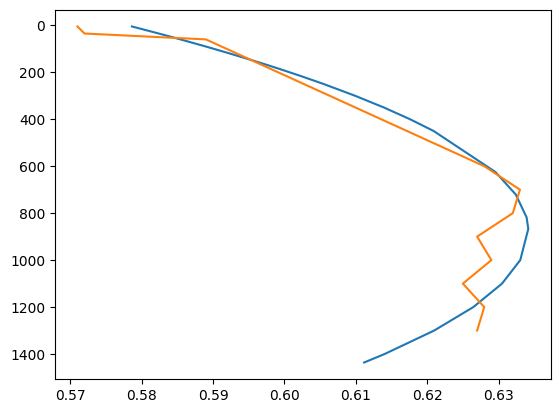

In [4]:
plt.plot(salinity, depth)
plt.plot(salinity2, depth2)
plt.gca().invert_yaxis()

plt.show()

### Density ($\rho$)

To find the density of the lake for each of these depths, the formula below can be used:

$$ \rho_0 = 999.842594 + 6.793952 * 10^{-2} * T - 9.095290 * 10^{-3} * T^2 + 1.001685 * 10^{-4} * T^3 - 1.120083 * 10^{-6} * T^4 + 6.536336 * 10^{-9} * T^5 $$

$$\rho = \rho_0(T) + A * S + B * S^{1.5} + C * S$$

with:

* $A = 8.24493 * 10^{-1} - 4.0899 * 10^{-3} * T + 7.6438 * 10^{-5} * T^2 - 8.2467 * 10^{-7} * T^3 + 5.3875 * 10^{-9} * T^4$
* $B = -5.72466 * 10^{-3} + 1.0227 * 10^{-4} * T - 1.6546 * 10^{-6} * T^2$
* $C = 4.8314 * 10^{-4}$

https://www.sciencedirect.com/science/article/pii/0198014981901229?ref=pdf_download&fr=RR-2&rr=806086102e8d0b56

In [5]:
# define a function for rho_0
def rho_0(T):
    rho_0 = 999.842594 + 6.793952 * 10**(-2) * (T) - 9.095290 * 10**(-3) * (T)**2 + 1.001685 * 10**(-4) * (T)**3 - 1.120083 * 10**(-6) * (T)**4 + 6.536336 * 10**(-9) * (T)**5
    return rho_0

# define a function for rho
def rho(T, S):
    
    # define the A, B, and C parameters used in the function for rho
    A = 8.24493 * 10**(-1) - 4.0899 * 10**(-3) * (T) + 7.6438 * 10**(-5) * (T)**2 - 8.2467 * 10**(-7) * (T)**3 + 5.3875 * 10**(-9) * (T)**4
    B = -5.72466 * 10**(-3) + 1.0227 * 10**(-4) * (T) - 1.6546 * 10**(-6) * (T)**2
    C = 4.8314 * 10**(-4) 
    
    rho = rho_0(T) + A * S + B * S**(1.5) + C * S
    return rho

In [6]:
# initiate lists to save the density and the difference in density for each step in z
density = []
difference = []

# loop through the temperatures
for i in range (0, len(temperature)):
    T = temperature[i]
    S = salinity[i]

    # add the density for each step in z
    density.append(rho(T, S)) 
    
    # define the difference between rho and rho_0 for each step and save it to the list
    delta = rho(T, S) - rho_0(T)
    difference.append(delta)
    
print(density)

[996.8585066218657, 996.9161739494125, 997.1875818485231, 997.5372376742142, 997.711174664482, 997.792800857599, 997.8339841665623, 997.8627088750987, 997.8836041416437, 997.8857730816808, 997.8954652660778, 997.9133075426661, 997.9187774778511, 997.9360250122162, 997.9337058975929, 997.9499079755055, 997.9496594332502, 997.9604264141826, 997.9654130502787, 997.9717616078577, 997.9770200280109, 997.9835521098236, 997.9865691307374, 997.9884664881972, 997.9886845743085]


### Pressure (P)

The following code is build so that the pressure at each step is calculated following the formula P=ρ⋅g⋅z and a form of very rough integration in steps. 

In [7]:
value_saved = 0

# The gravitational constant (in m/s)
gravitational_acceleration = 9.80665

def pressure(i):
    if i == 0:
        lower_half = 0
        upper_half = depth[i]
    else:
        # Determine how many meters should be calculated with what density
        lower_half = ((depth[i - 1] + depth[i]) / 2) - depth[i - 1]
        upper_half = depth[i] - ((depth[i - 1] + depth[i]) / 2)  
    
    lower_density = density[i - 1]    
    upper_density = density[i]
    
    pressure_step = lower_density * gravitational_acceleration * lower_half + upper_density * gravitational_acceleration * upper_half
    return pressure_step
    
pressure_steps = []

for i in range(0, len(depth)):
    pressure_one = pressure(i)
    pressure_steps.append(pressure_one)

# Total pressure starts at 100000 Pascal for the air pressure
total_pressure = 100000
pressure = []
    
for i in range(0, len(pressure_steps)):
    total_pressure = total_pressure + pressure_steps[i]
    
    # Divide by 100000 to get the pressure in bars
    pressure.append(total_pressure / 100000)
    
print(pressure)

[1.488792123698166, 3.6395396755328417, 5.399532659244466, 7.160073792868005, 9.899412190868583, 12.736947504793857, 15.08539711415672, 17.43392899113476, 19.293229621286596, 22.13114232694293, 25.458370100720245, 30.351419626186463, 35.24452630532808, 40.13768868003788, 45.03088765419455, 62.157203190934595, 71.55228566744455, 81.04528361448178, 85.84075341720991, 98.85710251762761, 108.64388807734231, 118.43073144972006, 128.21762164445192, 138.00453593597814, 141.52782881510223]


# GSW Package


There is a python package in which a source code is available with which you can determine water parameters at https://teos-10.org/. 

The citation is the following:

@book{mcdougall2011getting,
  author = {McDougall, T. J. and Barker, P. M.},
  title = {Getting started with TEOS-10 and the Gibbs Seawater (GSW) Oceanographic Toolbox},
  year = {2011},
  pages = {28},
  publisher = {SCOR/IAPSO WG127},
  isbn = {978-0-646-55621-5}
}

In [6]:
pip install gsw

^C
Note: you may need to restart the kernel to use updated packages.


In [8]:
import gsw

### Conservative Temperature (CT)

In [9]:
# absolute salinity in g/kg
SA = salinity

# in-situ temperature in C
t = temperature

# since we want the depth to have negative values for the following formula we convert it
z = [-i for i in depth]

# pressure in dbar
p = gsw.p_from_z(z, -6.5)

print(p)

# find conservative temperature
CT = gsw.CT_from_t(SA, t, p)

print(CT)

[   5.02801298   27.15272862   45.25653618   63.36193397   91.52904584
  120.70617949  144.85589067  169.00842434  188.13118115  217.32195472
  251.550862    301.89776182  352.25688057  402.62820813  453.01173439
  629.44999482  726.30224612  824.20880532  873.68409504 1008.03273671
 1109.10304106 1210.22157068 1311.38824379 1412.60297852 1449.05203272]
[28.70940513 28.49536722 27.45580793 26.06076906 25.34398424 25.00375846
 24.83190416 24.71237827 24.62518545 24.61975044 24.58203111 24.50999572
 24.49019676 24.41821699 24.42972929 24.35522228 24.34760024 24.28772399
 24.25770076 24.20147024 24.15146048 24.09108477 24.0410993  23.99112232
 23.97396127]


### Thermal Expansion Coefficient ($\alpha$)

In [10]:
alpha = gsw.alpha(SA, CT, p)

print(alpha)

[0.00026763 0.00026612 0.00025752 0.00024568 0.00023977 0.00023718
 0.00023602 0.00023531 0.00023483 0.00023522 0.0002354  0.00023553
 0.00023612 0.00023624 0.00023711 0.00023912 0.00024051 0.00024145
 0.00024193 0.00024345 0.00024453 0.00024552 0.00024659 0.00024766
 0.00024805]


### Speed of Sound ($c_s$)

In [11]:
sound_speed = gsw.sound_speed(SA, CT, p)

print(depth)
print(sound_speed)

[5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1000, 1100, 1200, 1300, 1400, 1436]
[1503.53512228 1503.40633872 1501.17598527 1497.95739375 1496.57667752
 1496.18094787 1496.13991023 1496.23668012 1496.33233254 1496.820673
 1497.30878916 1497.98142059 1498.79460352 1499.46622159 1500.36382161
 1503.19287932 1504.83479986 1506.35078556 1507.11688266 1509.26485856
 1510.85794146 1512.42173705 1514.01371897 1515.60525408 1516.18041804]


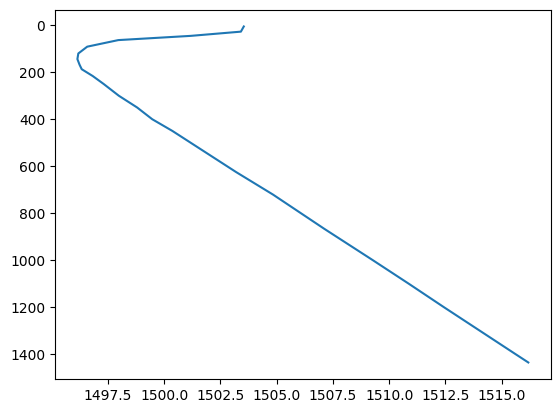

In [12]:
fig, ax = plt.subplots()

ax.plot(sound_speed, depth)
ax.invert_yaxis()

### Isobaric Heat Capacity ($C_p$)

In [13]:
cp_t_exact = gsw.cp_t_exact(SA, t, p)

print(cp_t_exact)

[4177.07241337 4176.49641168 4176.27944817 4176.21837967 4175.65011505
 4174.91224702 4174.25905091 4173.58569465 4173.04985685 4172.18561743
 4171.18641967 4169.72712011 4168.25637078 4166.80774914 4165.34101612
 4160.29393851 4157.55423796 4154.82007503 4153.44775632 4149.75112725
 4147.00217688 4144.27838709 4141.57934281 4138.90520744 4137.94865978]


# Grüneisen Parameter ($\gamma$)

In [14]:
gruneisen_parameter_gsw = []

for i in range(0, len(depth)):
    gruneisen = (((sound_speed[i])**2) * alpha[i]) / cp_t_exact[i]
    gruneisen_parameter_gsw.append(gruneisen)
    
print(gruneisen_parameter_gsw)

[0.14483910764710398, 0.14401711621381172, 0.1389603583102848, 0.13200414690248244, 0.12860917734784977, 0.12717628331815328, 0.12656286073752576, 0.12622355636883795, 0.12599389179728585, 0.12631434302187675, 0.12652566930975784, 0.12675018348782596, 0.12724973498609968, 0.12747628970078348, 0.1281413623052883, 0.12987199036355457, 0.13099794776336104, 0.1318657778487848, 0.13230631775136015, 0.133636515410825, 0.13459943061215587, 0.135511272217021, 0.1364794929872325, 0.13745029389926455, 0.13780468237379784]


In [15]:
# calculate a point at depth 1500
z = 1436

t_depth = temperature[18]
p_depth = gsw.p_from_z(-z, -6.5)

SA_depth = 0.578 + (0.001 * 1.28305 * 10**(-1) * z) - (0.001 * 7.32604 * 10**(-5) * z**2)

# use the gsw module
CT_depth = gsw.CT_from_t(SA_depth, t_depth, p_depth)
alpha_depth = gsw.alpha(SA_depth, CT_depth, p_depth)
sound_speed_gsw_depth = gsw.sound_speed(SA_depth, CT_depth, p_depth)
print(sound_speed_gsw_depth)
cp_t_exact_depth = gsw.cp_t_exact(SA_depth, t_depth, p_depth)

# calculate grüneisen parameter
gruneisen_gsw_depth = (((sound_speed_gsw_depth)**2) * alpha_depth) / cp_t_exact_depth

gruneisen_parameter_gsw_depth = gruneisen_parameter_gsw + [gruneisen_gsw_depth]

depth_depth = [5, 27, 45, 63, 91, 120, 144, 168, 187, 216, 250, 300, 350, 400, 450, 625, 721, 818, 867, 1000, 1100, 1200, 1300, 1400, 1436]


1516.6704594889763


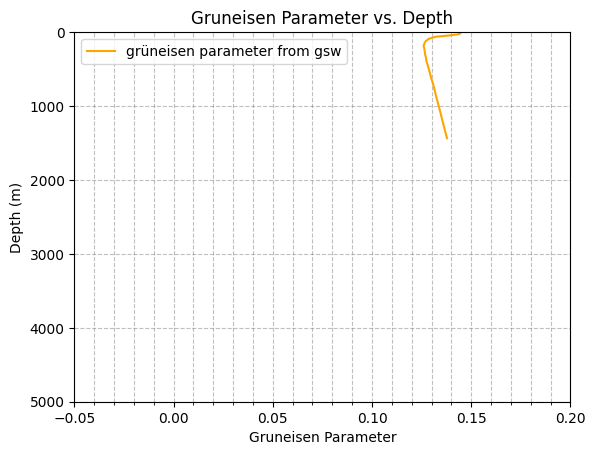

The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is 0.13871097668554674.


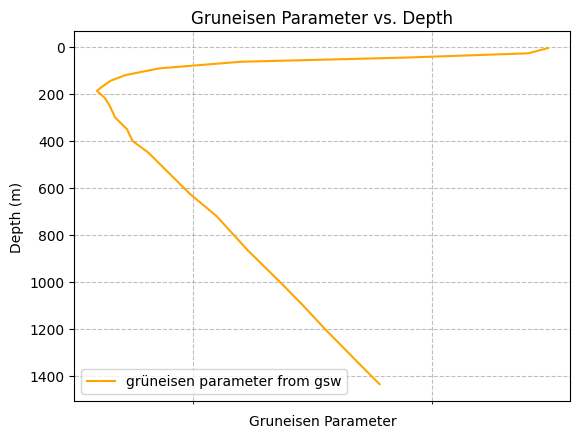

In [16]:
# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw, depth_depth, color='orange', label='grüneisen parameter from gsw')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_xlim(-0.05, 0.2)
ax.set_ylim(5000, 0)

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

print(f"The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is {gruneisen_gsw_depth}.")

# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw, depth_depth, color='orange', label='grüneisen parameter from gsw')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

# Change in Parameters

To see how much effect each of the parameters has on the final grüneisen parameter we are going to plot the change in parameter for changing each of the other parameters. We are going to do this at one depth, namely z = 867m. This means that the temperature at that point is T = 23.25 degrees Celsius.

In [88]:
t_point = temperature[18]
z_point = depth[18]
p_point = p[18]
SA_point = SA[18]
original_gruneisen = gruneisen_parameter_gsw[18]

### Change Salinity

In [89]:
# make two lists to keep track of the change in gruneisen vs the change in salinity
SA_change = []
changes_SA = []

for i in range(-100, 100, 1):
    percentage = i/100
    
    # decrease and increase the salinity at depth z = 867m with a certain percentage
    SA_percentage = SA_point + SA_point * percentage
    
    SA_change.append((SA_percentage - SA_point) / SA_point * 100)

    # calculate the conservative temperature, expanion coefficient, speed of sound, and heat capacity
    CT_point = gsw.CT_from_t(SA_percentage, t_point, p_point)
    alpha_point = gsw.alpha(SA_percentage, CT_point, p_point)
    sound_speed_point = gsw.sound_speed(SA_percentage, CT_point, p_point)
    cp_t_exact_point = gsw.cp_t_exact(SA_percentage, t_point, p_point)
    
    # calculate the grüneisen parameter
    gruneisen_point = (((sound_speed_point**2) * alpha_point) / cp_t_exact_point)
                       
    # calculate the change in grüneisen parameter with the original one
    change = (gruneisen_point - original_gruneisen) / original_gruneisen * 100
    changes_SA.append(change)    

### Change Temperature

In [18]:
# make two lists to keep track of the change in gruneisen vs the change in salinity
t_change = []
changes_t = []

for i in range(-100, 100, 1):
    percentage = i/100
    
    # decrease and increase the salinity at depth z = 867m with a certain percentage
    t_percentage = t_point + t_point * percentage
    
    t_change.append((t_percentage - t_point) / t_point * 100)

    # calculate the conservative temperature, expanion coefficient, speed of sound, and heat capacity
    CT_point = gsw.CT_from_t(SA_point, t_percentage, p_point)
    alpha_point = gsw.alpha(SA_point, CT_point, p_point)
    sound_speed_point = gsw.sound_speed(SA_point, CT_point, p_point)
    cp_t_exact_point = gsw.cp_t_exact(SA_point, t_point, p_point)
    
    # calculate the grüneisen parameter
    gruneisen_point = (((sound_speed_point**2) * alpha_point) / cp_t_exact_point)
                       
    # calculate the change in grüneisen parameter with the original one
    change = (gruneisen_point - original_gruneisen) / original_gruneisen * 100
    changes_t.append(change)

### Change Pressure

In [19]:
# make two lists to keep track of the change in gruneisen vs the change in salinity
p_change = []
changes_p = []

for i in range(-100, 100, 1):
    percentage = i/100
    
    # decrease and increase the salinity at depth z = 867m with a certain percentage
    p_percentage = p_point + p_point * percentage
    
    p_change.append((p_percentage - p_point) / p_point * 100)

    # calculate the conservative temperature, expanion coefficient, speed of sound, and heat capacity
    CT_point = gsw.CT_from_t(SA_point, t_point, p_percentage)
    alpha_point = gsw.alpha(SA_point, CT_point, p_percentage)
    sound_speed_point = gsw.sound_speed(SA_point, CT_point, p_percentage)
    cp_t_exact_point = gsw.cp_t_exact(SA_point, t_point, p_percentage)
    
    # calculate the grüneisen parameter
    gruneisen_point = (((sound_speed_point**2) * alpha_point) / cp_t_exact_point)
                       
    # calculate the change in grüneisen parameter with the original one
    change = (gruneisen_point - original_gruneisen) / original_gruneisen * 100
    changes_p.append(change)

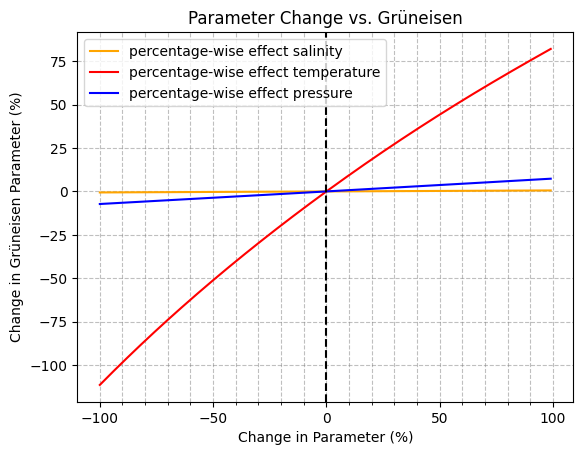

In [20]:
# change in parameters 
fig, ax = plt.subplots()

ax.plot(SA_change, changes_SA, color='orange', label='percentage-wise effect salinity')
ax.plot(t_change, changes_t, color='red', label='percentage-wise effect temperature')
ax.plot(p_change, changes_p, color='blue', label='percentage-wise effect pressure')

# add labels and a title
ax.set_xlabel('Change in Parameter (%)')
ax.set_ylabel('Change in Grüneisen Parameter (%)')

ax.legend()
ax.set_title('Parameter Change vs. Grüneisen')

# set line to  make an origin of sorts
ax.axvline(x=0, color='black', linestyle='--')

# customize grid intervals
major_locator = MultipleLocator(50)  # Set the major grid interval
minor_locator = MultipleLocator(10)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# show the plot
plt.show()


# Compute Changes

### Change Salinity

In [21]:
# make two lists to keep track of the change in gruneisen vs the change in salinity
changes_SA_grun = []
SA_new = []

for i in range(-100, 10000, 1):
    percentage = i/100
    
    # decrease and increase the salinity at depth z = 867m with a certain percentage
    SA_percentage = SA_point + SA_point * percentage
    
    SA_new.append(SA_percentage)
    
    # calculate the conservative temperature, expanion coefficient, speed of sound, and heat capacity
    CT_point = gsw.CT_from_t(SA_percentage, t_point, p_point)
    alpha_point = gsw.alpha(SA_percentage, CT_point, p_point)
    sound_speed_point = gsw.sound_speed(SA_percentage, CT_point, p_point)
    cp_t_exact_point = gsw.cp_t_exact(SA_percentage, t_point, p_point)
    
    # calculate the grüneisen parameter
    gruneisen_point = (((sound_speed_point**2) * alpha_point) / cp_t_exact_point)
                       
    # calculate the change in grüneisen parameter with the original one
    change = (gruneisen_point - original_gruneisen) / original_gruneisen * 100
    changes_SA_grun.append(change) 

### Change Temperature

In [22]:
# make two lists to keep track of the change in gruneisen vs the change in salinity
changes_t_grun = []
t_new = []

for i in range(-100, 100, 1):
    percentage = i/100
    
    # decrease and increase the salinity at depth z = 867m with a certain percentage
    t_percentage = t_point + t_point * percentage
    
    t_new.append(t_percentage)

    # calculate the conservative temperature, expanion coefficient, speed of sound, and heat capacity
    CT_point = gsw.CT_from_t(SA_point, t_percentage, p_point)
    alpha_point = gsw.alpha(SA_point, CT_point, p_point)
    sound_speed_point = gsw.sound_speed(SA_point, CT_point, p_point)
    cp_t_exact_point = gsw.cp_t_exact(SA_point, t_point, p_point)
    
    # calculate the grüneisen parameter
    gruneisen_point = (((sound_speed_point**2) * alpha_point) / cp_t_exact_point)
                       
    # calculate the change in grüneisen parameter with the original one
    change = (gruneisen_point - original_gruneisen) / original_gruneisen * 100
    changes_t_grun.append(change)

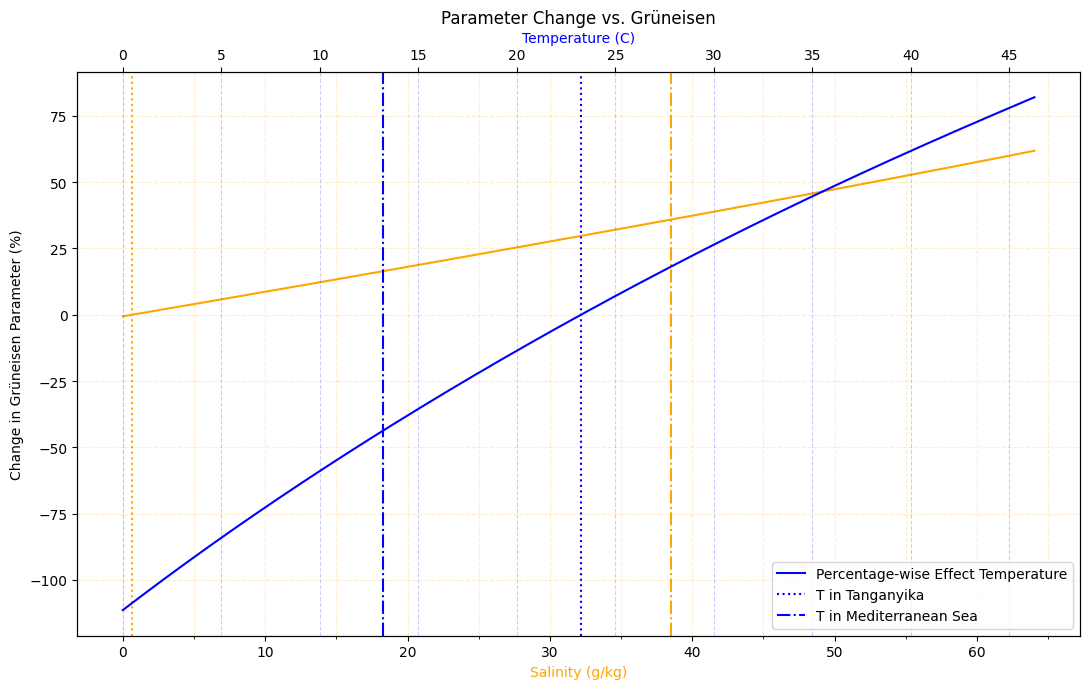

In [23]:
# Create the first plot with SA_new on the x-axis
fig, ax1 = plt.subplots(figsize=(11, 7))

ax1.plot(SA_new, changes_SA_grun, color='orange', label='Percentage-wise Effect Salinity')

# Add labels and a title for the first plot
ax1.set_xlabel('Salinity (g/kg)', color='orange')
ax1.set_ylabel('Change in Grüneisen Parameter (%)')
ax1.set_title('Parameter Change vs. Grüneisen')

# Customize grid intervals for the first plot
major_locator = MultipleLocator(10)
minor_locator = MultipleLocator(5)
ax1.xaxis.set_major_locator(major_locator)
ax1.xaxis.set_minor_locator(minor_locator)
ax1.grid(True, which='both', linestyle='--', color='orange', alpha=0.2)

# plot the salinity of the water
ax1.axvline(x=SA[18], color='orange', linestyle='dotted', label = 'SA in Tanganyika')
ax1.axvline(x=38.48, color='orange', linestyle='dashdot', label = 'SA in Mediterranean Sea')

#ax1.legend(loc='lower right', fontsize= '7')


# Create a second y-axis for the second parameter
ax2 = ax1.twiny()

# Plot the second parameter data with t_change on the x-axis
ax2.plot(t_new, changes_t_grun, color='blue', label='Percentage-wise Effect Temperature')

# Add labels and a legend for the second plot
ax2.set_xlabel('Temperature (C)', color='blue')

# Customize grid intervals for the second plot
major_locator2 = MultipleLocator(5)
minor_locator2 = MultipleLocator(10)
ax2.xaxis.set_major_locator(major_locator2)
ax2.xaxis.set_minor_locator(minor_locator2)
ax2.grid(True, which='both', linestyle='--', color='blue', alpha=0.2)

ax2.axvline(x=t[18], color='blue', linestyle='dotted', label = 'T in Tanganyika')
ax2.axvline(x=13.2, color='blue', linestyle='dashdot', label = 'T in Mediterranean Sea')

# create a single combined legend
plt.legend(loc='lower right', fontsize='10')


# Show the plot
plt.tight_layout()
plt.show()

# Mediteranean Sea

The temperatures and salinities are taken from the following paper on page 88:
https://www.sincem.unibo.it/images/tesi/tesi_giusti.pdf


Additional temperatures are taken from:
https://www.researchgate.net/publication/269628883_Seasonal_cycle_of_the_Mixed_Layer_the_Seasonal_Thermocline_and_the_Upper-Ocean_Heat_Storage_Rate_in_the_Mediterranean_Sea_derived_from_observations/link/5c6a9f18a6fdcc404eb7a3a3/download


Also from:
https://www.mdpi.com/2673-1924/2/1/4

Salinity of a different point in mediteranean sea are taken from:
https://www.nature.com/articles/s41598-020-77859-5

salinity2 from:
https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2014JC009937

In [17]:
# I have taken 11/2009 (the red curves)

# depth in m (I added the 4000 meter point)
depth_M = [0, 25, 50, 75, 90, 100, 150, 500, 1000]
# temperature in degrees Celsius
t_M = [20.6, 19.3, 16.9, 14.2, 13.9, 13.8, 13.7, 13.4, 13.2]
# salinity in psu
salinity_M = [37.81, 37.85, 37.9, 38.00, 38.02, 38.1, 38.25, 38.52, 38.48]


salinity2_M = [37.81, 37.85, 37.9, 38.00, 38.7, 38.95, 38.981, 38.98, 38.975, 38.97, 38.95, 38.91, 38.85, 38.82, 38.8, 38.78, 38.765, 38.8]
salinity2_M = [37.81, 37.85, 37.9, 38.00, 38.7, 38.95, 38.981, 38.98, 38.975, 38.97, 38.95, 38.91, 38.83, 38.79, 38.77, 38.755, 38.75, 38.62]

depth2_M = [0, 25, 50, 75, 100, 200, 300, 350, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200, 4000]
t2_M = [20.0, 19.0, 15.3, 15.1, 15, 14.9, 14.8, 14.75, 14.7, 14.6, 14.4, 14.25, 14.08, 13.95, 13.82, 13.75, 13.7, 13.3]

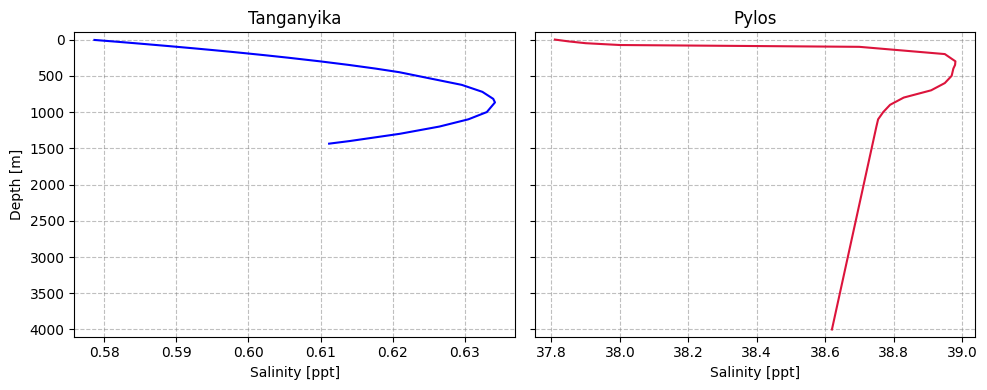

In [23]:
import matplotlib.gridspec as gridspec

# Create a grid with 1 row and 3 columns, where the third column spans two columns
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1])  # Adjust the width ratios as needed

# Create subplots
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

# Plot data on the first subplot (ax1)
ax1.plot(salinity, depth, color='blue')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Salinity [ppt]')

ax1.invert_yaxis()  # Invert y-axis for the first subplot
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.set_ylim(4100, -100)
ax1.set_title('Tanganyika')

# Plot data on the second subplot (ax2)
ax2.plot(salinity2_M, depth2_M, color='crimson')
ax2.set_xlabel('Salinity [ppt]')
ax2.invert_yaxis()  # Invert y-axis for the first subplot
ax2.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax2.set_yticklabels([])  # Remove y-axis labels for the second subplot
ax2.set_ylim(4100, -100)
ax2.set_title('Pylos')

plt.savefig('Water Salinity vs. Depth.jpg')
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


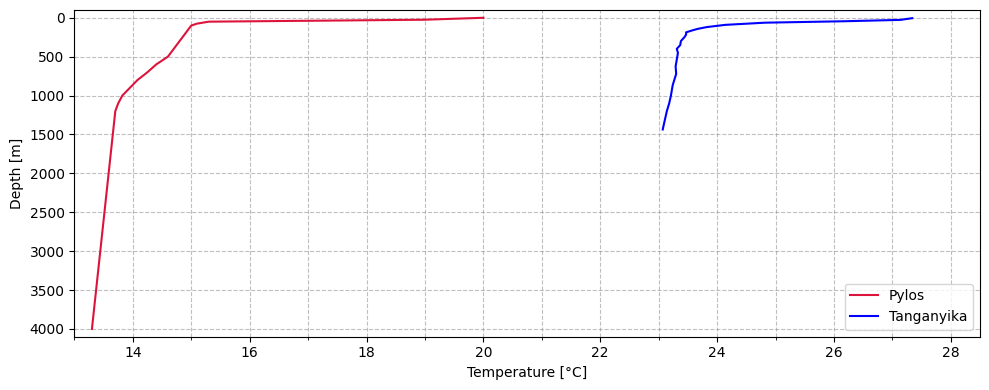

In [24]:
# Create a grid with 1 row and 3 columns, where the third column spans two columns
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1])  # Adjust the width ratios as needed

# Create subplots
ax1 = plt.subplot(gs[0])

# Plot data on the first subplot (ax1)
ax1.plot(t2_M, depth2_M, color='crimson', label='Pylos')
ax1.plot(temperature, depth, color='blue', label='Tanganyika')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Temperature [\u00B0C]')
ax1.invert_yaxis()  # Invert y-axis for the first subplot
major_locator = MultipleLocator(2)  # Set the major grid interval
minor_locator = MultipleLocator(1)  # Set the minor grid interval
ax1.xaxis.set_major_locator(major_locator)
ax1.xaxis.set_minor_locator(minor_locator)
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.set_xlim(13, 28.5)
ax1.set_ylim(4100, -100)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Water Temperature vs. Depth.jpg')
plt.show()


In [25]:
# find the absolute salinity
z = [-i for i in depth_M]
z2 = [-i for i in depth2_M]

p_M = gsw.p_from_z(z, 42.72)
p2_M = gsw.p_from_z(z2, 42.72)

SA_M = gsw.SA_from_SP(salinity_M, p_M, 4.4386, 42.72)
SA2_M = gsw.SA_from_SP(salinity2_M, p2_M, 4.4386, 42.72)

print(p_M)
print(SA_M)

[  -0.           25.20080155   50.40468591   75.61165179   90.73730993
  100.82169793  151.25102595  504.60031595 1010.42408199]
[37.99073761 38.03072889 38.08103118 38.18145929 38.20173104 38.28223481
 38.4324831  38.70352153 38.66356468]


In [26]:
# find conservative temperature
CT_M = gsw.CT_from_t(SA_M, t_M, p_M)
CT2_M = gsw.CT_from_t(SA2_M, t2_M, p2_M)

print(CT_M)

[20.50256688 19.19991336 16.80144685 14.10512996 13.80369137 13.70072816
 13.59023405 13.23367918 12.96078413]


In [27]:
alpha_M = gsw.alpha(SA_M, CT_M, p_M)
alpha2_M = gsw.alpha(SA2_M, CT2_M, p2_M)

print(alpha_M)

[0.00026658 0.00025637 0.00023671 0.00021373 0.00021132 0.00021074
 0.00021095 0.00021453 0.00022088]


In [28]:
sound_speed_M = gsw.sound_speed(SA_M, CT_M, p_M)
sound_speed2_M = gsw.sound_speed(SA2_M, CT2_M, p2_M)

T4000 = 13.2
S4000 = 38.7
p4000 = gsw.p_from_z(-4000, 42.72)
SA4000 = gsw.SA_from_SP(S4000, 1000, 4.4386, 42.72)
CT4000 = gsw.CT_from_t(SA4000, T4000, 1000)
sound_speed4000 = gsw.sound_speed(SA4000, CT4000, 1000)

depth_M1 = [0, 25, 50, 75, 90, 100, 150, 500, 1000, 4000]
sound_speed_M1 = [1526.1641276,  1523.07609121, 1516.65415601, 1508.87374928, 1508.18366911, 1508.12100824, 1508.79805363, 1513.91431425, 1521.4932753, 1565]

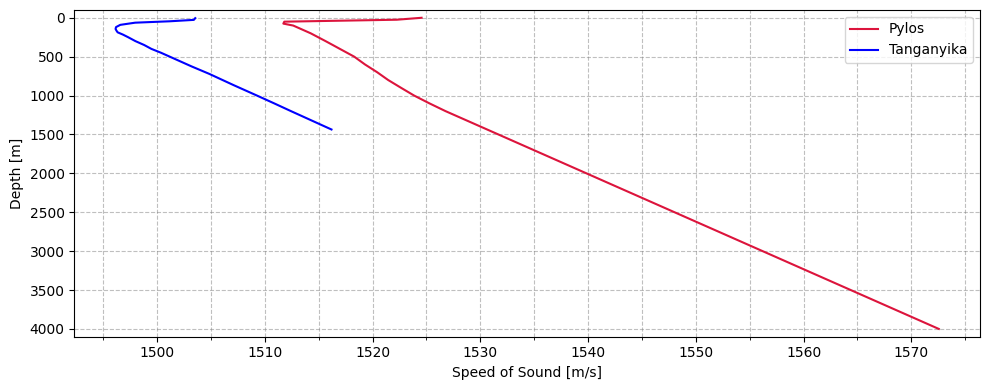

In [29]:
# Create a grid with 1 row and 3 columns, where the third column spans two columns
fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(1, 1, width_ratios=[1])  # Adjust the width ratios as needed

# Create subplots
ax1 = plt.subplot(gs[0])

# Plot data on the first subplot (ax1)
ax1.plot(sound_speed2_M, depth2_M, color='crimson', label='Pylos')
ax1.plot(sound_speed, depth, color='blue', label='Tanganyika')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Speed of Sound [m/s]')
ax1.invert_yaxis()  # Invert y-axis for the first subplot
major_locator = MultipleLocator(10)  # Set the major grid interval
minor_locator = MultipleLocator(5)  # Set the minor grid interval
ax1.xaxis.set_major_locator(major_locator)
ax1.xaxis.set_minor_locator(minor_locator)
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.set_ylim(4100, -100)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Speed of Sound vs. Depth.jpg')
plt.show()

In [83]:
cp_t_exact_M = gsw.cp_t_exact(SA_M, t_M, p_M)
cp_t_exact2_M = gsw.cp_t_exact(SA2_M, t2_M, p2_M)

print(cp_t_exact_M)

[3982.57647227 3980.90858403 3978.35748999 3975.22680244 3974.5159845
 3973.77666068 3971.67061598 3961.32159848 3949.23738495]


In [84]:
gruneisen_parameter_gsw_M = []

for i in range(0, len(cp_t_exact_M)):
    gruneisen_M = (((sound_speed_M[i])**2) * alpha_M[i]) / cp_t_exact_M[i]
    gruneisen_parameter_gsw_M.append(gruneisen_M)
    
print(gruneisen_parameter_gsw_M)

[0.1559057459349285, 0.14939389537265174, 0.13686395532235573, 0.12240537814903106, 0.12094024836592158, 0.1206214776953496, 0.12091370814650818, 0.12412362253962132, 0.1294724849634464]


In [85]:
gruneisen_parameter2_gsw_M = []

for i in range(0, len(cp_t_exact2_M)):
    gruneisen2_M = (((sound_speed2_M[i])**2) * alpha2_M[i]) / cp_t_exact2_M[i]
    gruneisen_parameter2_gsw_M.append(gruneisen2_M)
    
print(gruneisen_parameter2_gsw_M)

[0.15275273861631924, 0.14779940525282143, 0.1280791692750977, 0.1274238124709336, 0.12818567919113874, 0.12924022826995957, 0.12998874467411614, 0.1303416975412626, 0.13069050923720676, 0.13140010867536012, 0.13154792850913394, 0.13194822306509166, 0.1321889356291888, 0.13271320188155095, 0.13327360776905753, 0.13417301989933494, 0.13520021279991867, 0.17052325573484944]


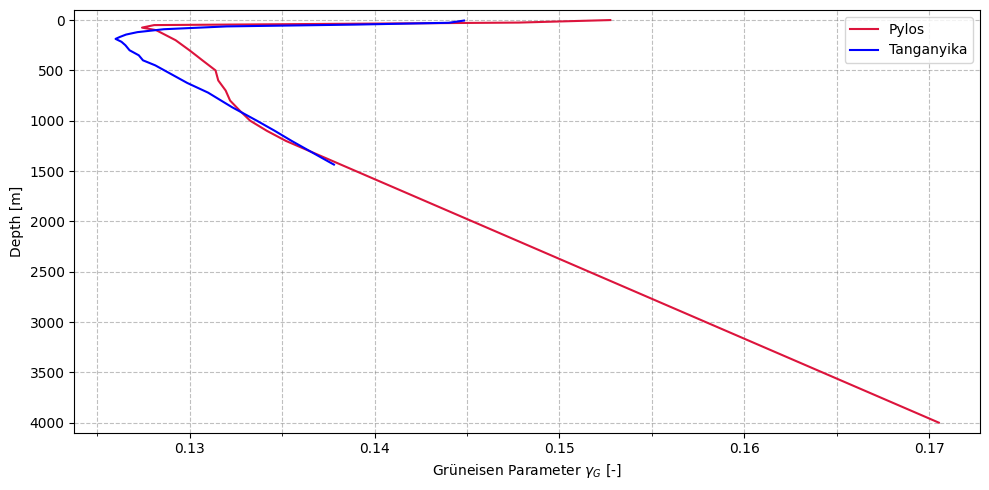

In [90]:
# Create a grid with 1 row and 3 columns, where the third column spans two columns
fig = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(1, 1, width_ratios=[1])  # Adjust the width ratios as needed

# Create subplots
ax1 = plt.subplot(gs[0])

# Plot data on the first subplot (ax1)
ax1.plot(gruneisen_parameter2_gsw_M, depth2_M, color='crimson', label='Pylos')
ax1.plot(gruneisen_parameter_gsw, depth_depth, color='blue', label='Tanganyika')
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel(f'Grüneisen Parameter $\gamma_G$ [-]')
ax1.invert_yaxis()  # Invert y-axis for the first subplot
major_locator = MultipleLocator(.01)  # Set the major grid interval
minor_locator = MultipleLocator(.005)  # Set the minor grid interval
ax1.xaxis.set_major_locator(major_locator)
ax1.xaxis.set_minor_locator(minor_locator)
ax1.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)
ax1.set_ylim(4100, -100)

plt.legend()
plt.tight_layout()  # Adjust layout to prevent overlap
plt.savefig('Grüneisen Parameter vs. Depth.jpg')
plt.show()

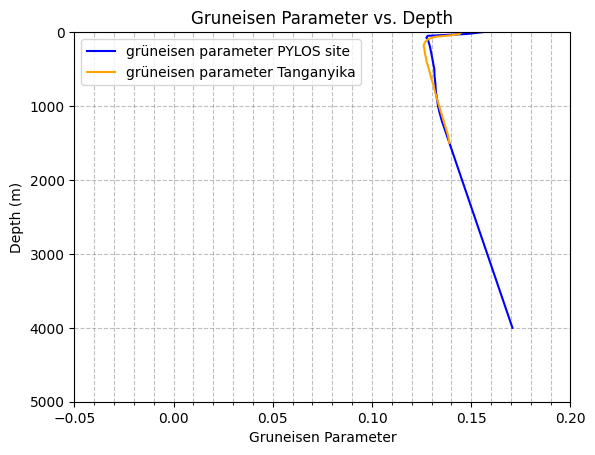

The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is 0.13948808361402296.


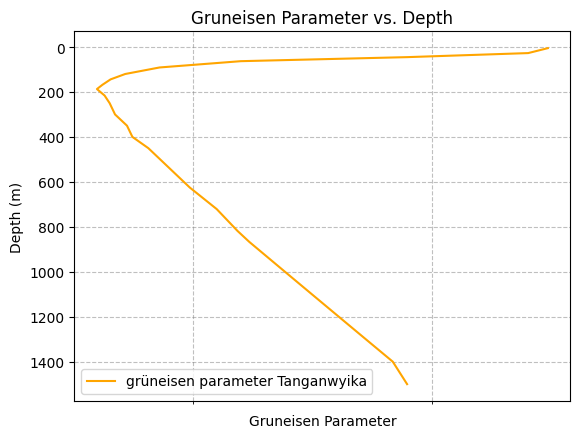

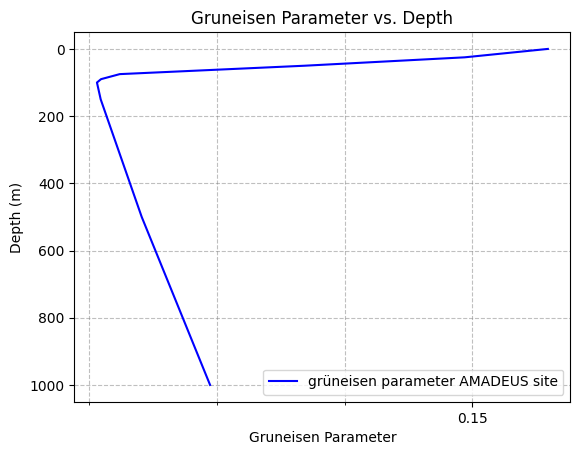

In [293]:
# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
#ax.plot(gruneisen_parameter_gsw_M, depth_M, color='green', label='grüneisen parameter AMADEUS site')
ax.plot(gruneisen_parameter2_gsw_M, depth2_M, color='blue', label='grüneisen parameter PYLOS site')
ax.plot(gruneisen_parameter_gsw, depth_depth, color='orange', label='grüneisen parameter Tanganyika')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()
ax.set_xlim(-0.05, 0.2)
ax.set_ylim(5000, 0)

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

print(f"The predicted grüneisen parameter at a depth of 1500 meter in the Tanganyika lake is {gruneisen_gsw_depth}.")

# GRUNEISEN PARAMETER
fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw, depth, color='orange', label='grüneisen parameter Tanganwyika')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()


fig, ax = plt.subplots()

# plot the depth against the gruneisen parameter in a graph
# plt.scatter(gruneisen_parameter, depth_1, color='red')
#ax.plot(gruneisen_parameter_depth, depth_depth, color='orange', label='c_s from formula c')
ax.plot(gruneisen_parameter_gsw_M, depth_M, color='blue', label='grüneisen parameter AMADEUS site')


# Add labels and a title
ax.set_xlabel('Gruneisen Parameter')
ax.set_ylabel('Depth (m)')
ax.invert_yaxis()

ax.legend()
ax.set_title('Gruneisen Parameter vs. Depth')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
ax.xaxis.set_major_locator(major_locator)
ax.xaxis.set_minor_locator(minor_locator)
ax.grid(True, which='both', linestyle='--', color='gray', alpha=0.5)

# Show the plot
plt.show()

# COMPARISON PARAMETERS TANGANYIKA AND Pylos site

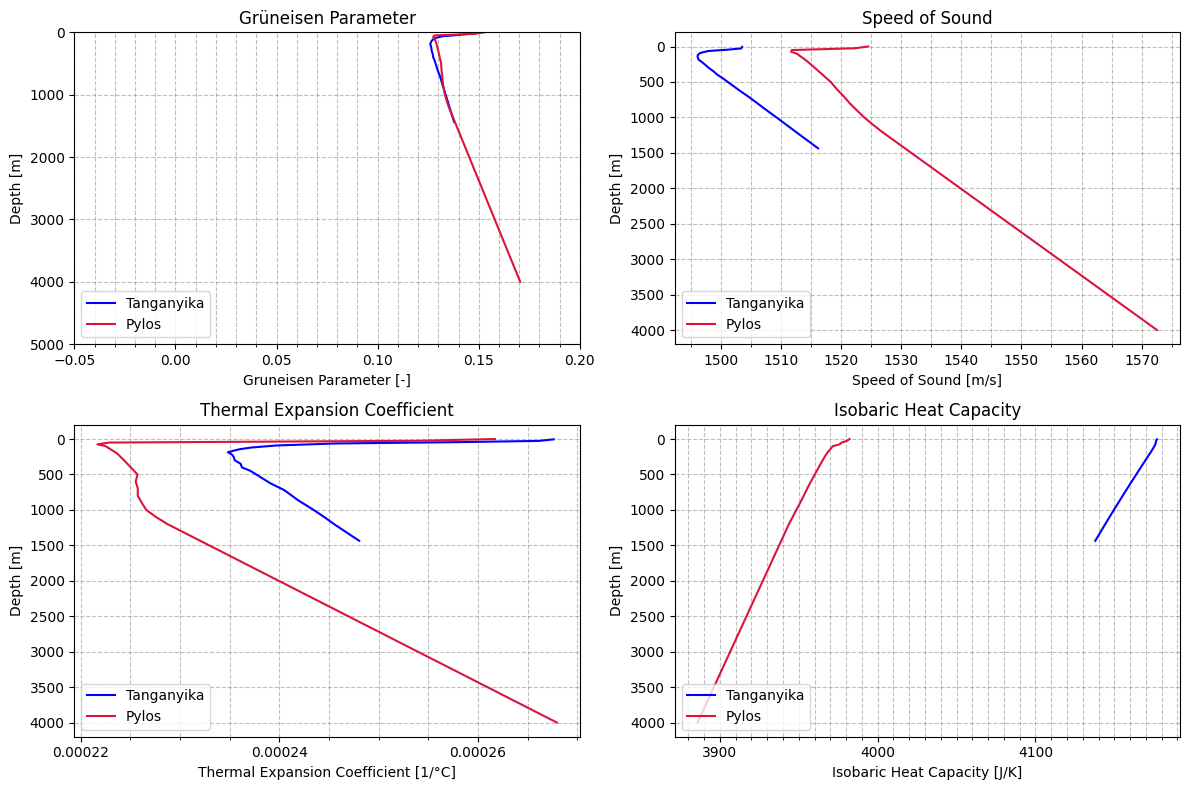

In [105]:
# make figure
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Grüneisen Parameter
axs[0,0].plot(gruneisen_parameter_gsw, depth_depth, color='blue', label='Tanganyika')
axs[0,0].plot(gruneisen_parameter2_gsw_M, depth2_M, color='crimson', label='Pylos')

# Add labels and a title
axs[0,0].set_xlabel('Gruneisen Parameter [-]')
axs[0,0].set_ylabel('Depth [m]')
axs[0,0].invert_yaxis()
axs[0,0].set_xlim(-0.05, 0.2)
axs[0,0].set_ylim(5000, 0)

axs[0,0].legend(loc="lower left")
axs[0,0].set_title('Grüneisen Parameter')

# Customize grid intervals
major_locator = MultipleLocator(0.05)  # Set the major grid interval
minor_locator = MultipleLocator(0.01)  # Set the minor grid interval
axs[0,0].xaxis.set_major_locator(major_locator)
axs[0,0].xaxis.set_minor_locator(minor_locator)
axs[0,0].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Speed of Sound
axs[0,1].plot(sound_speed, depth, color='blue', label='Tanganyika')
axs[0,1].plot(sound_speed2_M, depth2_M, color='crimson', label='Pylos')

# Add labels and a title
axs[0,1].set_xlabel('Speed of Sound [m/s]')
axs[0,1].set_ylabel('Depth [m]')
axs[0,1].invert_yaxis()

axs[0,1].legend(loc="lower left")
axs[0,1].set_title('Speed of Sound')

# Customize grid intervals
major_locator = MultipleLocator(10)  # Set the major grid interval
minor_locator = MultipleLocator(5)  # Set the minor grid interval
axs[0,1].xaxis.set_major_locator(major_locator)
axs[0,1].xaxis.set_minor_locator(minor_locator)
axs[0,1].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Thermal Expansion Coëfficient
axs[1,0].plot(alpha, depth, color='blue', label='Tanganyika')
axs[1,0].plot(alpha2_M, depth2_M, color='crimson', label='Pylos')

# Add labels and a title
axs[1,0].set_xlabel('Thermal Expansion Coefficient [1/\u00B0C]')
axs[1,0].set_ylabel('Depth [m]')
axs[1,0].invert_yaxis()

axs[1,0].legend()
axs[1,0].set_title('Thermal Expansion Coefficient')

# Customize grid intervals
major_locator = MultipleLocator(0.00002)  # Set the major grid interval
minor_locator = MultipleLocator(0.000005)  # Set the minor grid interval
axs[1,0].xaxis.set_major_locator(major_locator)
axs[1,0].xaxis.set_minor_locator(minor_locator)
axs[1,0].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



# Isobaric Heat Capacity
axs[1,1].plot(cp_t_exact, depth, color='blue', label='Tanganyika')
axs[1,1].plot(cp_t_exact2_M, depth2_M, color='crimson', label='Pylos')

# Add labels and a title
axs[1,1].set_xlabel('Isobaric Heat Capacity [J/K]')
axs[1,1].set_ylabel('Depth [m]')
axs[1,1].invert_yaxis()

axs[1,1].legend(loc="lower left")
axs[1,1].set_title('Isobaric Heat Capacity')

# Customize grid intervals
major_locator = MultipleLocator(100)  # Set the major grid interval
minor_locator = MultipleLocator(10)  # Set the minor grid interval
axs[1,1].xaxis.set_major_locator(major_locator)
axs[1,1].xaxis.set_minor_locator(minor_locator)
axs[1,1].grid(True, which='both', linestyle='--', color='gray', alpha=0.5)



plt.tight_layout()

plt.savefig('grüneisen.png')

# Show the plot
plt.show()




The ANTARES temperature profile: https://www.sincem.unibo.it/images/tesi/tesi_Zanella.pdf

In [7]:
depth_A = [1, 30, 40, 50, 60, 80, 100, 200, 400, 600, 800, 1000, 2000, 2475]
T_A = [17.15, 16.54, 15.7, 14.85, 14.23, 13.52, 13.25, 13.12, 13.7, 12.98, 12.9, 12.8, 12.6, 12.6]
salinity_A = [38.1875, 38.2, 38.225, 38.26, 38.2875, 38.3925, 38.42, 38.535, 38.56, 38.567, 38.594, 38.6175, 38.635, 38.63]

# We want to get the sound speed
z = [-i for i in depth_A]
print(z)
p_A = gsw.p_from_z(z, 36.17)
print(p_A)
SA_A = gsw.SA_from_SP(salinity_A, p_A, 15.58, 36.17)
print(SA_A)
CT_A = gsw.CT_from_t(SA_A, T_A, p_A)
print(CT_A)
sound_speed_A = gsw.sound_speed(SA_A, CT_A, p_A)
print(sound_speed_A)



[-1, -30, -40, -50, -60, -80, -100, -200, -400, -600, -800, -1000, -2000, -2475]
[1.00737657e+00 3.02234406e+01 4.02989062e+01 5.03748644e+01
 6.04513150e+01 8.06056933e+01 1.00762041e+02 2.01573288e+02
 4.03343080e+02 6.05308726e+02 8.07469573e+02 1.00982497e+03
 2.02449714e+03 2.50814065e+03]
[38.36818194 38.38073812 38.40580078 38.44097842 38.46859004 38.57408379
 38.60182643 38.7175703  38.74286744 38.75014871 38.77738676 38.80110381
 38.81868276 38.81367701]
[17.05084521 16.43780888 15.59873831 14.74975057 14.13023929 13.41805495
 13.14584996 12.99944088 13.54551168 12.80124287 12.69162854 12.56211297
 12.20919092 12.13222773]
[1516.91274542 1515.59515449 1513.24625848 1510.8198138  1509.0588021
 1507.2299758  1506.71243224 1508.06772055 1513.27973833 1514.23874969
 1517.31426587 1520.32601248 1536.36730689 1544.35065635]


# SOURCES

Thermodynamic properties of sea water: 
https://www.researchgate.net/publication/289966693_THERMODYNAMICS_OF_SEAWATER_-_1_THE_PVT_PROPERTIES

Temperature of lake Tanganyika: https://www.researchgate.net/publication/10687739_Ecological_consequences_of_warming_in_Lake_Tanganyika

Grüneisen Parameter (Acoustic search for high-energy neutrinos in the Lake Baikal: Results and plans): https://www.sciencedirect.com/science/article/pii/S0168900210027002

Thermodynamics with the Grüneisen parameter: Fundamentals and applications to high pressure physics and geophysics:
https://www.sciencedirect.com/science/article/abs/pii/S0031920118301705

The density of artificial river and estuarine waters:
https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/JC081i006p01177

Lake Tanganyika; Water Chemistry, Sediments, Geological Structure:
https://link.springer.com/content/pdf/10.1007/BF00602986.pdf

Lake Tanganyika Geochemical and Hydrographic Study:
https://escholarship.org/content/qt4ct114wz/qt4ct114wz_noSplash_ad2bbf2b98876465fa063ff4c8248bdc.pdf

The interpretation of temperature and salinity variables in numerical ocean model output and the calculation of heat fluxes and heat content:
https://gmd.copernicus.org/articles/14/6445/2021/

Evaluation of the Thermal Expansion Coefficient Using Non-Destructive Testing:
https://www.researchgate.net/figure/The-volumetric-coefficient-of-thermal-expansion-of-water-as-a-function-of-temperature_fig5_283292378

A simple molecular thermodynamic theory of hydrophobic hydration:
https://www.researchgate.net/publication/234925177_A_simple_molecular_thermodynamic_theory_of_hydrophobic_hydration

ANTARES temperature profile:
https://www.sincem.unibo.it/images/tesi/tesi_Zanella.pdf